<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-03-10 02:13:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  28.8MB/s    in 1.2s    

2024-03-10 02:13:58 (28.8 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


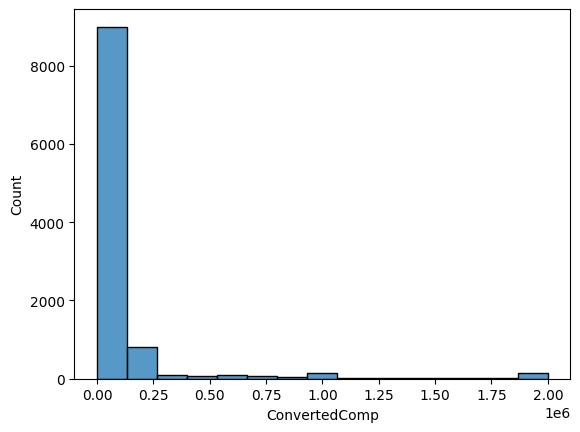

In [8]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
sns.histplot(x = 'ConvertedComp',data = df,bins = 15);

### Box Plots


Plot a box plot of `Age.`


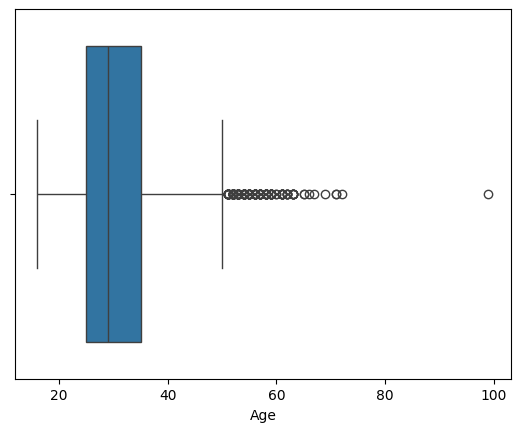

In [9]:
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
sns.boxplot(x = 'Age',data = df);

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


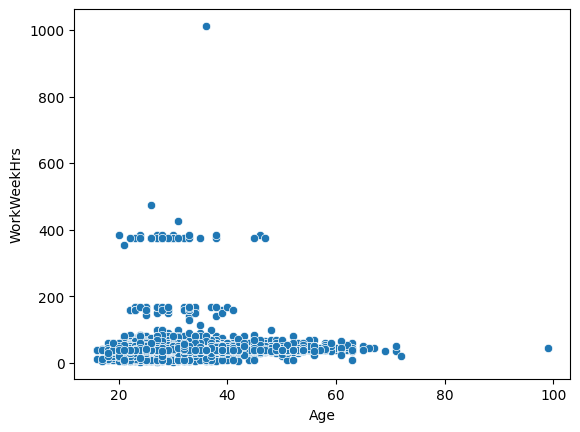

In [10]:
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(x = 'Age',y='WorkWeekHrs',data = df);

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


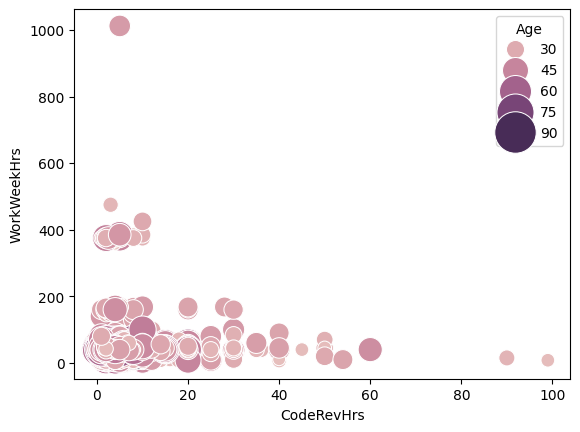

In [16]:
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(x = df['CodeRevHrs'],y = df['WorkWeekHrs'],hue = df['Age'],size = df['Age'],sizes = (1,1000));

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


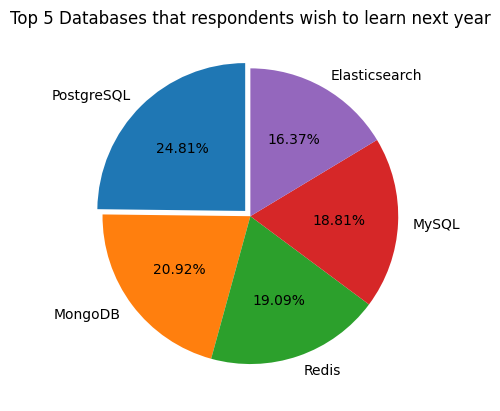

In [41]:
QUERY = """
SELECT DatabaseDesireNextYear as Databases, count(*) as no_of_Respondents
FROM DatabaseDesireNextYear
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)
plt.pie(df['no_of_Respondents'],labels = df['Databases'],autopct = '%.2f%%',explode = [0.05,0,0,0,0],startangle = 90)
plt.title('Top 5 Databases that respondents wish to learn next year')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [30]:
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY,conn)
df

,Age,WorkWeekHrs,CodeRevHrs
0,31.0,8.0,3.0
1,34.0,40.0,2.0
2,32.0,40.0,2.0
3,34.0,42.0,15.0
4,33.0,40.0,2.0
...,...,...,...
2937,32.0,42.0,4.0
2938,32.0,50.0,2.0
2939,32.0,56.0,14.0
2940,34.0,40.0,5.0


In [31]:
df.describe()

,Age,WorkWeekHrs,CodeRevHrs
count,2942.000000,2917.000000,2379.000000
mean,32.210401,42.909479,4.784443
std,1.710495,24.753388,4.135441
min,30.000000,4.000000,0.000000
25%,31.000000,40.000000,2.000000
50%,32.000000,40.000000,4.000000
75%,34.000000,42.000000,5.000000
max,35.000000,425.000000,54.000000


In [32]:
df2 = df.groupby('Age')[['WorkWeekHrs','CodeRevHrs']].median()

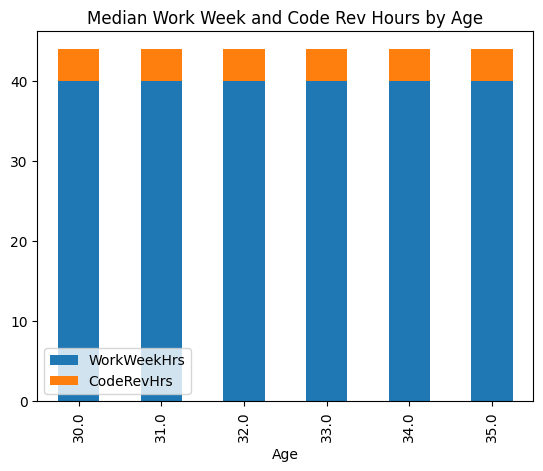

In [35]:
df2.plot(kind = 'bar',stacked = True)
plt.title('Median Work Week and Code Rev Hours by Age')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [45]:
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY,conn)
df

,Age,ConvertedComp
0,47.0,103000.0
1,54.0,NaN
2,47.0,54996.0
3,47.0,62807.0
4,45.0,72522.0
...,...,...
594,45.0,76339.0
595,46.0,68705.0
596,48.0,300000.0
597,50.0,87668.0


In [46]:
df2 = df.groupby('Age')['ConvertedComp'].median()

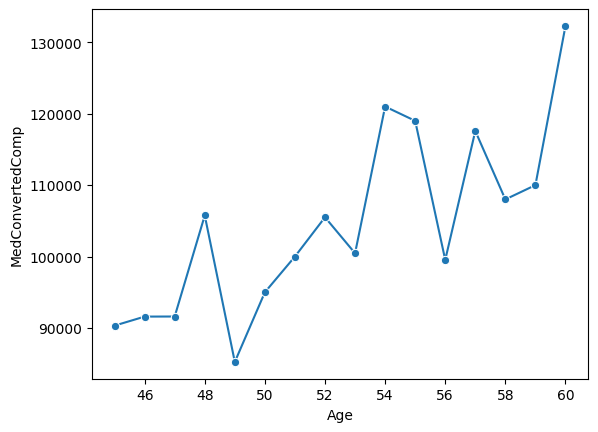

In [51]:
data = pd.DataFrame({'Age': df2.index, 'MedConvertedComp': df2.values})

sns.lineplot(x = 'Age',y = 'MedConvertedComp',data = data,marker = 'o',linestyle = '-')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [52]:
Query = """SELECT MainBranch, count(*) as Frequency
FROM master GROUP BY MainBranch"""
df = pd.read_sql_query(Query, conn)

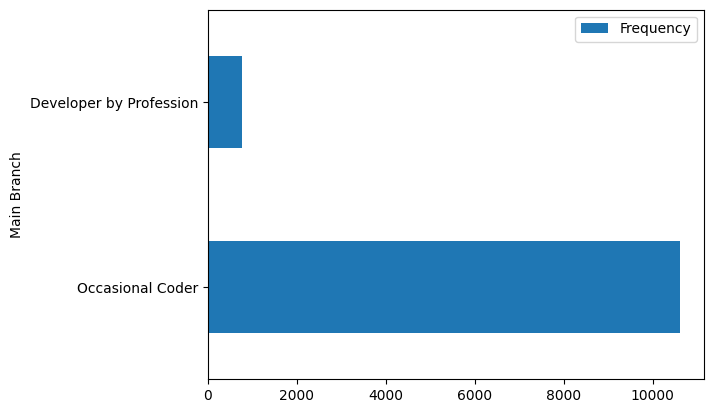

In [62]:
df.plot(kind = 'barh')
plt.ylabel('Main Branch')
plt.yticks(ticks = [0,1],labels = ['Occasional Coder', 'Developer by Profession'])
plt.show()

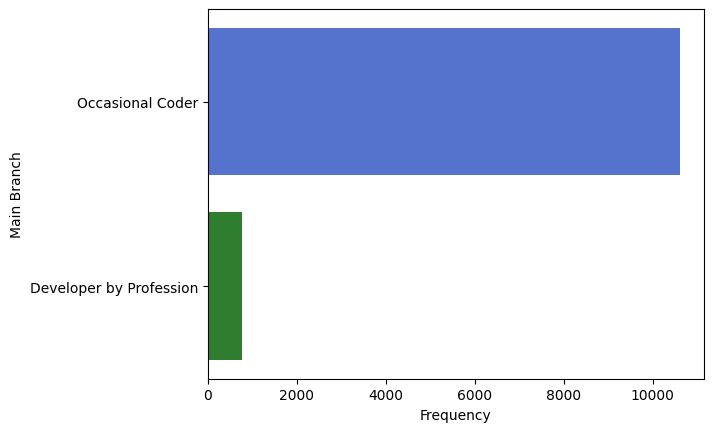

In [72]:
sns.barplot(x = df['Frequency'],y = df['MainBranch'],orient = 'h',hue = df['MainBranch'],palette = ['royalblue','forestgreen'])
plt.ylabel('Main Branch')
plt.yticks(ticks = [0,1],labels = ['Occasional Coder', 'Developer by Profession'])
plt.show()

Close the database connection.


In [73]:
conn.close()